# Analisis dan Visualisasi Clustering Penyewaan Sepeda

## Pendahuluan

Tujuan dari analisis ini adalah untuk mengidentifikasi pola dalam data penyewaan sepeda dan mengelompokkan data berdasarkan karakteristik penyewaan. Saya menggunakan dataset `hour.csv`, yang berisi informasi tentang penyewaan sepeda per jam.

## Persiapan Data

Load Data dan Konversi Tipe Data:

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv('hour.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
```

Preprocessing Data: Standarisasi Fitur Numerik:

```python
features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)
```

## Clustering dengan KMeans

Menerapkan KMeans:

```python
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
```

Visualisasi Clustering:

```python
px.scatter(df, x='temp', y='casual', color='cluster', title='Clustering Hasil Penyewaan Sepeda')
```

## Analisis Komponen Utama (PCA)

Melakukan PCA untuk Visualisasi Data Multidimensi:

```python
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
fig = px.scatter(components, x=0, y=1, color=df['cluster'])
fig.update_layout(title='PCA: Visualisasi Data Multidimensi', xaxis_title='PC1', yaxis_title='PC2')
fig.show()
```

## Analisis Korelasi

Menghitung dan Visualisasi Korelasi:

```python
corr_matrix = df[features + ['cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur dengan Jumlah Penyewaan')
plt.show()
```

## Rata-Rata Penyewaan Per Jam

Visualisasi Rata-Rata Penyewaan Per Jam:

```python
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hr', y='cnt', estimator='mean')
plt.title('Rata-Rata Penyewaan Sepeda Per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Penyewaan')
plt.grid(True)
plt.show()
```

Dengan analisis ini, saya dapat memahami pola penyewaan sepeda dan karakteristik penggunanya, yang dapat digunakan untuk menginformasikan keputusan manajemen dan strategi pemasaran.
g dapat digunakan untuk menginformasikan keputusan manajemen dan strategi pemasaran.
egi pemasaran.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cek missing values
print(df.isnull().sum())

# Cek tipe data
print(df.dtypes)

# Konversi 'dteday' menjadi tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
cluster       0
dtype: int64
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
cluster                int32
dtype: object


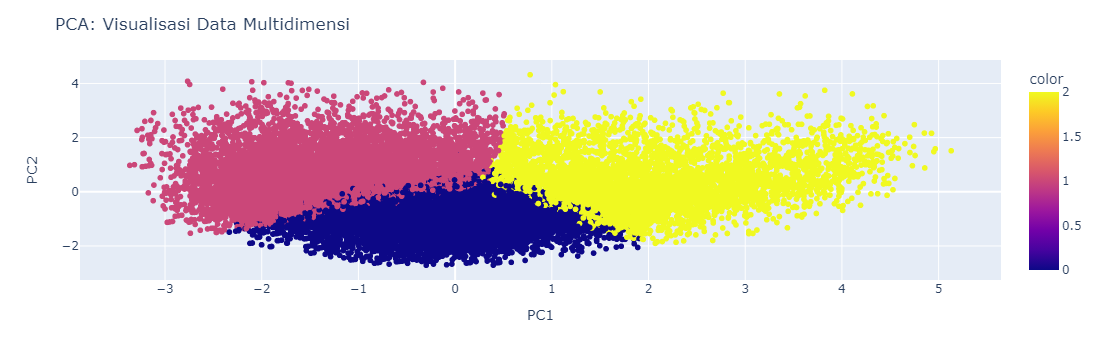

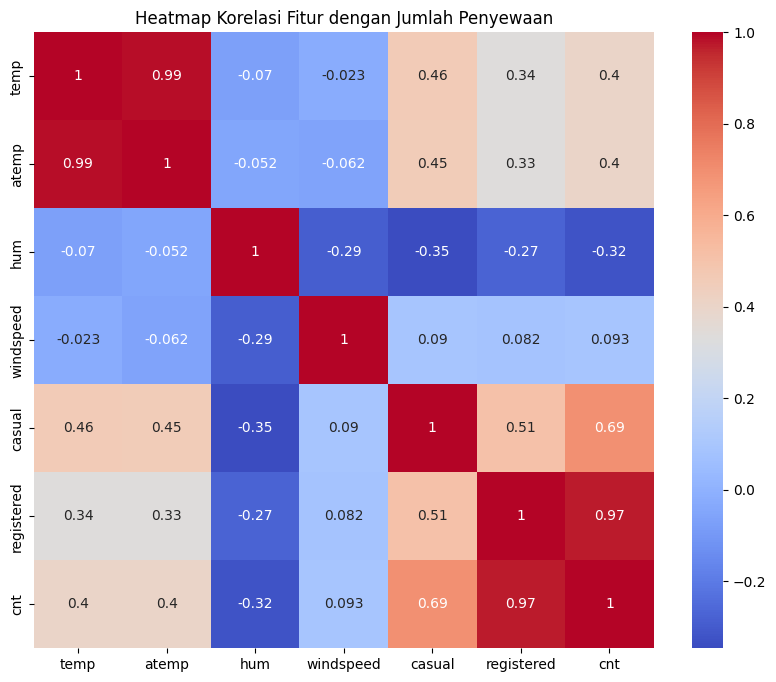

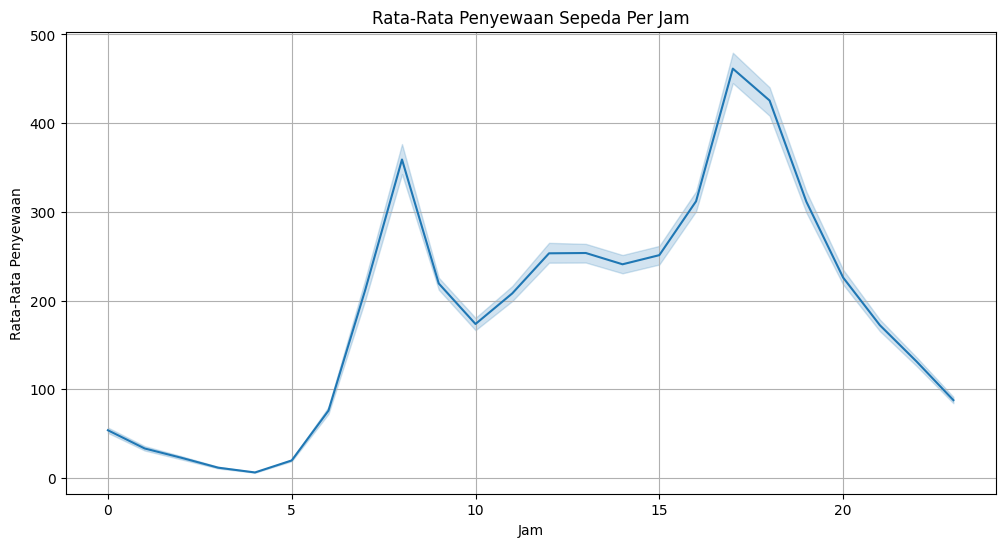

In [35]:
# Load data
df = pd.read_csv('hour.csv')

# Konversi kolom 'dteday' menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Preprocessing: Standarisasi fitur numerik
features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

# Clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi clustering
px.scatter(df, x='temp', y='casual', color='cluster', title='Clustering Hasil Penyewaan Sepeda')

# Analisis Komponen Utama (PCA) untuk visualisasi data multidimensi
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
fig = px.scatter(components, x=0, y=1, color=df['cluster'])
fig.update_layout(title='PCA: Visualisasi Data Multidimensi', xaxis_title='PC1', yaxis_title='PC2')
fig.show()

# Korelasi fitur dengan jumlah penyewaan
corr_matrix = df[features + ['cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur dengan Jumlah Penyewaan')
plt.show()

# Rata-rata penyewaan per jam dalam sehari
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hr', y='cnt', estimator='mean')
plt.title('Rata-Rata Penyewaan Sepeda Per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Penyewaan')
plt.grid(True)
plt.show()
